<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/IN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [2]:
# Data Overview and Centralized Data Cleaning for the Youtube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data_IN = pd.read_csv('../datasets/IN_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean_IN = youtube_data_IN.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean_IN.columns:
    youtube_data_clean_IN['description'] = youtube_data_clean_IN['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean_IN.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean_IN.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean_IN[['view_count', 'likes', 'dislikes', 'comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean_IN.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean_IN.head(3))

# This clean dataframe (youtube_data_clean_BR) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (251202, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...


In [3]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data_IN.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data_IN.columns:
    print(f"{col}: {youtube_data_IN[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 78847 unique values
title: 79952 unique values
publishedAt: 78160 unique values
channelId: 4521 unique values
channelTitle: 4802 unique values
categoryId: 15 unique values
trending_date: 1323 unique values
tags: 49787 unique values
view_count: 240402 unique values
likes: 134410 unique values
dislikes: 17039 unique values
comment_count: 32181 unique values
thumbnail_link: 78849 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 66830 unique values


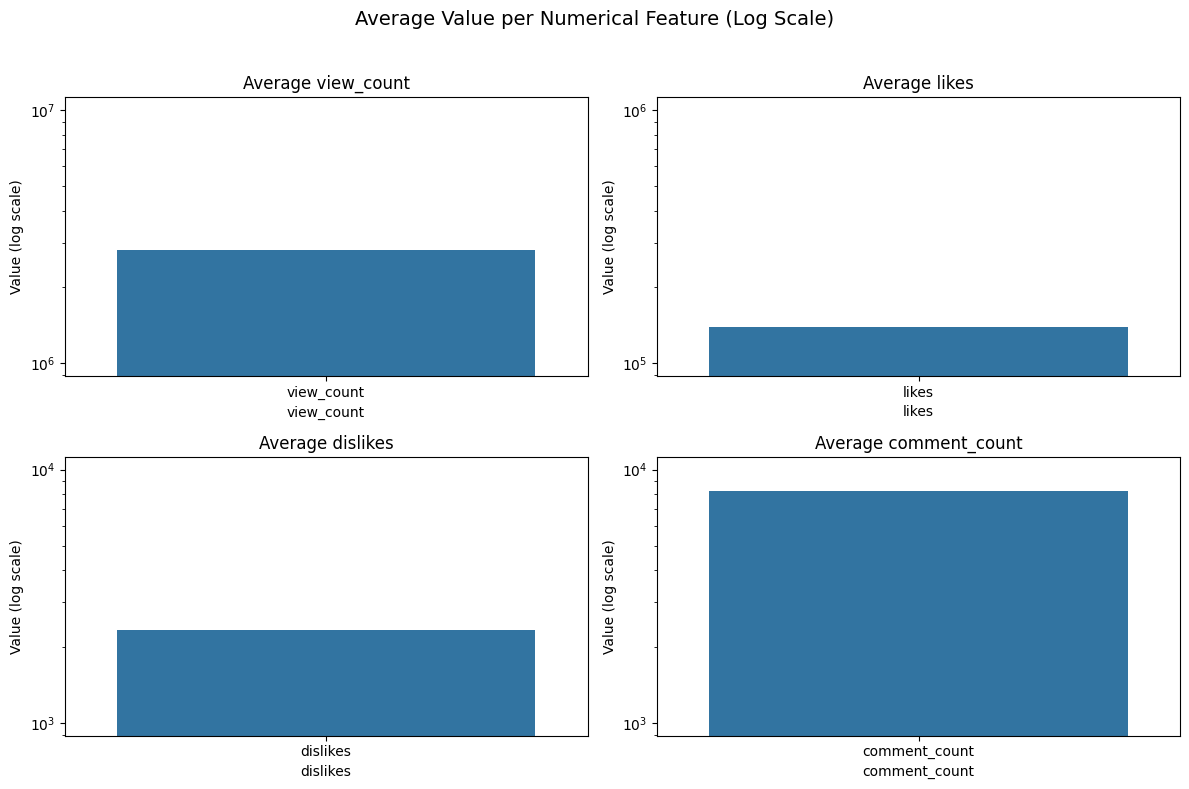

In [4]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize = 14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data_IN[col].mean()
    sns.barplot(x=[col], y = [avg_value], ax = axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

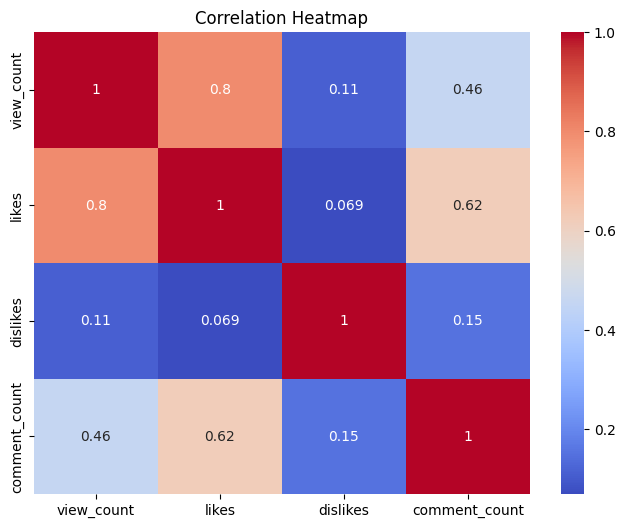

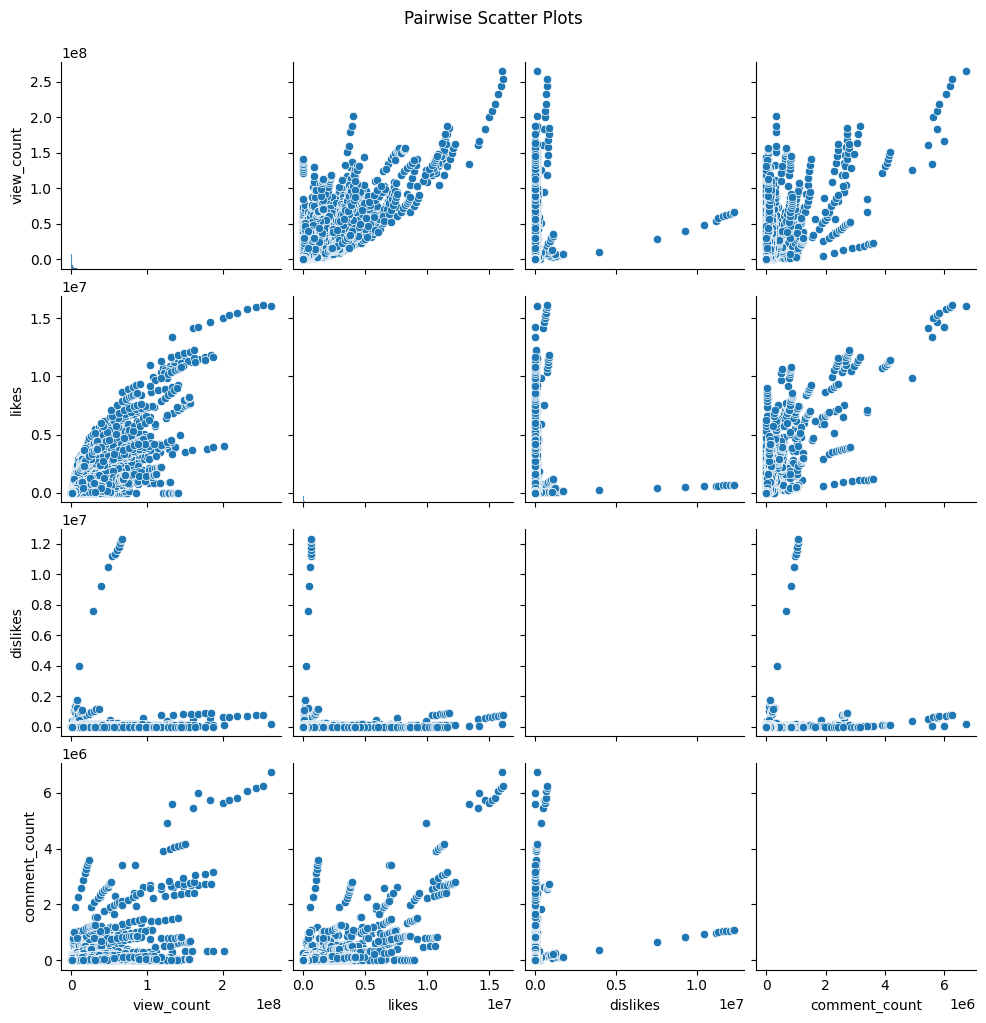

In [5]:
# Bivariate/Multivaraite Analysis: Correlation and scatter plots
plt.figure(figsize=(8, 6))
sns.heatmap(youtube_data_IN[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data_IN[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


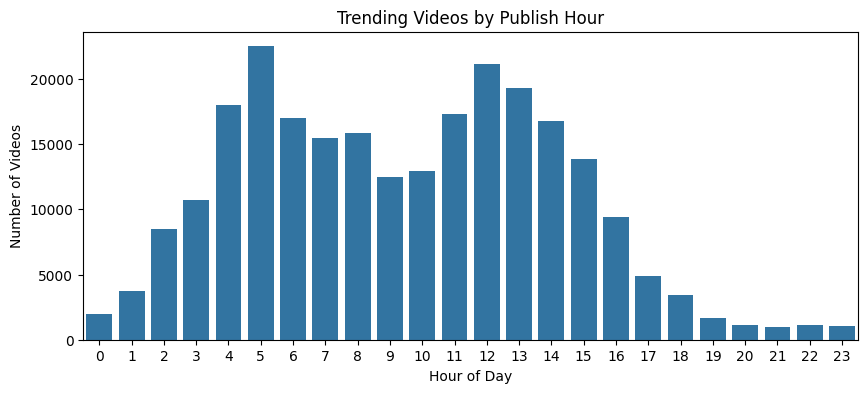

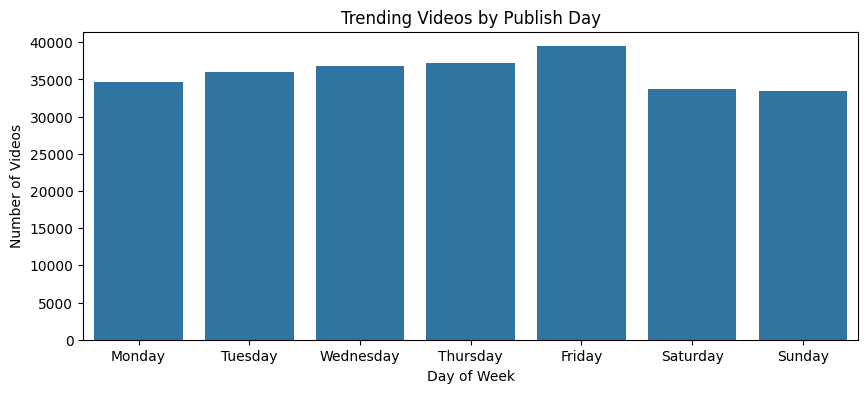

In [6]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data_IN.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data_IN.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data_IN[datetime_col].dtype, np.datetime64):
    youtube_data_IN[datetime_col] = pd.to_datetime(youtube_data_IN[datetime_col])

# Extract hour and day of week
youtube_data_IN['publish_hour'] = youtube_data_IN[datetime_col].dt.hour
youtube_data_IN['publish_day'] = youtube_data_IN[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data_IN)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize = (10,4))
sns.countplot(x='publish_day', data=youtube_data_IN, order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


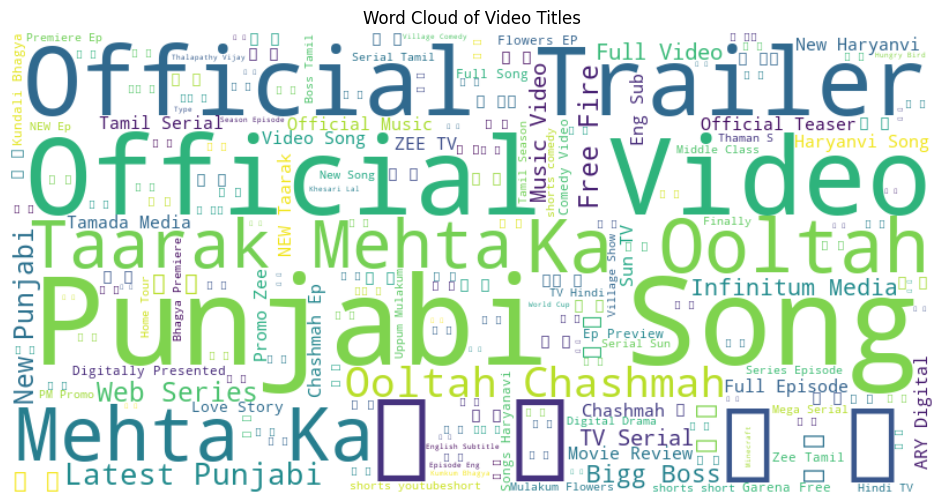

Most common tags:
comedy: 11358
funny: 7807
trending: 6414
entertainment: 4707
vlog: 4547
family: 4376
shorts: 3719
hindi comedy show: 3532
family vlogs: 3485
comedy video: 3339


In [8]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data_IN['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
all_tags = ','.join(youtube_data_IN['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    print(f'{tag}: {count}')

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [9]:
# Efficient Outlier Detection + Cached Translation (small scale)
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np

translation_cache = {}

def safe_translate(text):
    if text in translation_cache:
        return translation_cache[text]
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception:
        translated = text
    translation_cache[text] = translated
    return translated

# Outliers only — NOT whole dataset
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data_IN[col].quantile(0.25)
    q3 = youtube_data_IN[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = youtube_data_IN[(youtube_data_IN[col] < lower) | (youtube_data_IN[col] > upper)]
    top3 = outliers[['title', 'channelTitle', col]].sort_values(by=col, ascending=False).head(3)

    print(f"\nTop Outliers for {col}:")
    for _, row in top3.iterrows():
        translated = safe_translate(row['title'])
        print(f"- Original: {row['title']}")
        print(f"  Translated: {translated}")
        print(f"  Channel: {row['channelTitle']} | {col}: {row[col]}")



Top Outliers for view_count:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 264407389
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | view_count: 253995993
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | view_count: 244507902

Top Outliers for likes:
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 16115240
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16021542
- Original: BTS (방탄소년단) 'Dynamite' Official MV
  Translated: BTS ‘Dynamite’ Official MV
  Channel: Big Hit Labels | likes: 15948359

Top Outliers for dislikes:
- Original: Sadak 2 | Official Trailer | Sanjay | Pooja | Alia | Aditya | Jisshu | Mahesh Bhatt | 28 Aug
  Translated: Sa

# Summary and Insights
Based on the EDA performed on the IN (India) YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains over 250,000 trending video records from India, covering rich metadata and detailed engagement metrics.
- All duplicate rows were removed, and there were no missing values in the primary quantitative fields (views, likes, dislikes, comments).
- The cleaned dataset (youtube_data_clean_IN) was structured and ready for downstream modeling and country-level comparison.

**2. Feature Understanding:**
- Primary quantitative features: view_count, likes, dislikes, and comment_count
- Categorical and text features: categoryId, channelTitle, tags, title, description
- Temporal variables: publishedAt and trending_date supported daily and hourly pattern analysis.
- Text fields provide rich insight into India’s diverse media ecosystem across languages and genres.

**3. Univariate Analysis:**
- Right-skewed distributions across all major engagement metrics, with a majority of videos clustered at moderate levels and a long tail of viral content.
- The average video in the India dataset receives millions of views, but top outliers exceed 250M views.
- Indian trending content includes many regional hits and viral music videos.

**4. Bivariate/Multivariate Analysis:**
- view_count and likes show strong positive correlation (~0.80), supporting likes as a reliable early indicator of popularity.
- comment_count also shows moderate correlation (~0.46) with views.
- dislikes, though often large in volume (notably due to Sadak 2 backlash), have weak correlation with other features.
- Pairplots and heatmaps suggest non-linear relationships and varying density distributions across combinations.

**5. Temporal Analysis:**
- Publishing activity is highest during morning to early afternoon hours (especially between 4AM–1PM IST), which may align with scheduled TV-style releases and morning scroll traffic.
- Unlike other countries, India’s trending content is more evenly distributed across weekdays, with a slight Friday spike in trending frequency.
- This spread suggests consistent engagement across the week, not overly tied to weekends.

**6. Text Analysis:**
- Most common tags in IN trending content included:
    comedy, funny, trending, entertainment, vlog, family, shorts, hindi comedy show, family vlogs, and comedy video
- Reflects strong national appetite for relatable, humorous, and family-friendly content, including short-format and regional language programming.
- Word cloud also confirms the dominance of recurring terms like Official, Trailer, Punjabi, Taarak Mehta, and regional series/shows.

**7. Outlier Detection (w/ Translation):**
- Most viewed videos:
    BTS (방탄소년단) 'Butter' | HYBE LABELS | 264M+ views
    BTS 'Dynamite' | Big Hit Labels | 254M+, 244M+ views
- Most liked videos:
    BTS 'Dynamite' | 16.1M likes
    BTS 'Butter' | 16.0M likes
- Most disliked videos:
    “Sadak 2” trailer by FoxStarHindi | Over 12.3M dislikes — a highly polarizing event in Indian digital history.
- Top commented: BTS videos again dominate with over 6M comments, showing global fanbase spillover into Indian YouTube trends.

**Next Steps:**
- Next Steps: Develop regression models using early engagement features (likes, comment_count, etc.) to predict view_count.
- Construct a classification model to identify potential high-trending videos (e.g., top 10% in views).
- Leverage Indian-specific tags, multilingual content signals, or custom NLP pipelines to improve model accuracy and regional sensitivity.
- Compare model metrics with other country datasets to better understand cultural and algorithmic influences on virality.

In [10]:
# Predictive Modeling: Simple linear regression to predict view_count based on likes, dislikes, comment_count
features = ['likes', 'dislikes', 'comment_count']
target = 'view_count'
X = youtube_data_IN[features]
y = youtube_data_IN[target]
# --- IGNORE ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# --- IGNORE ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# --- IGNORE ---
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 17046010149054.531
R^2 Score: 0.6346606814227049


Linear Regression:
MSE: 1.3397959889453555
R^2: 0.28900994934655466


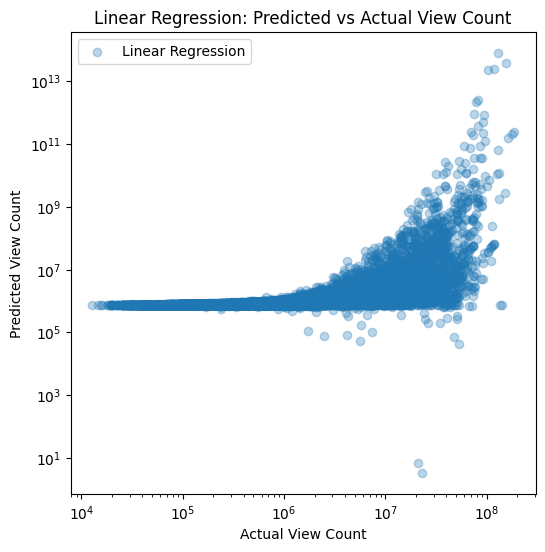

In [11]:
# Modeling: Linear Regression on cleaned data (log-transformed view count)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and target (using youtube_data_clean_GB from previous cleaning step)
youtube_data_clean_IN['log_view_count'] = np.log1p(youtube_data_clean_IN['view_count'])
features = ['likes', 'dislikes', 'comment_count']
X = youtube_data_clean_IN[features]
y = youtube_data_clean_IN['log_view_count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R^2:', r2_score(y_test, y_pred_lr))

# Visualize predictions versus actual (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_lr), alpha=0.3, label='Linear Regression')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Linear Regression: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

ROC-AUC: 0.968


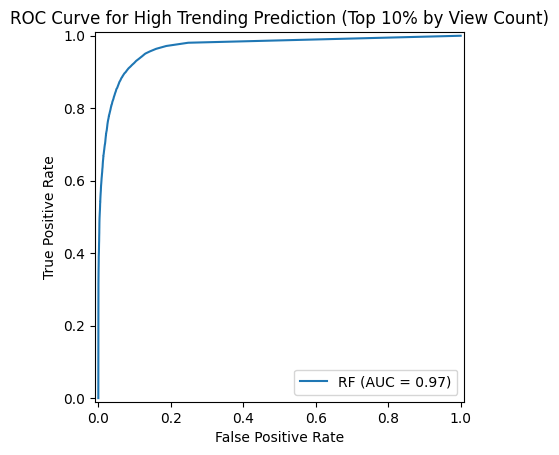

In [12]:
# Classification with ROC-AUC based on early engagement metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Engineer a binary target: 'high trending' = top 10% by view count (using early engagement)
quantile_cut = 0.9
threshold = youtube_data_clean_IN['view_count'].quantile(quantile_cut)
youtube_data_clean_IN['high_trending'] = (youtube_data_clean_IN['view_count'] >= threshold).astype(int)

# Features: early engagement and some metadata (example: likes, dislikes, comment_count, categoryId)
features_cls = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_cls = youtube_data_clean_IN[features_cls]
y_cls = youtube_data_clean_IN['high_trending']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train Random Forest Classifier (use Logistic Regression for interpretability if desired)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_proba = clf.predict_proba(X_test_cls)[:, 1]

# ROC-AUC Calculation
roc_auc = roc_auc_score(y_test_cls, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.3f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RF').plot()
plt.title('ROC Curve for High Trending Prediction (Top 10% by View Count)')
plt.show()

Random Forest Regression:
MSE: 0.48128433205190696
R^2: 0.7445966591572986


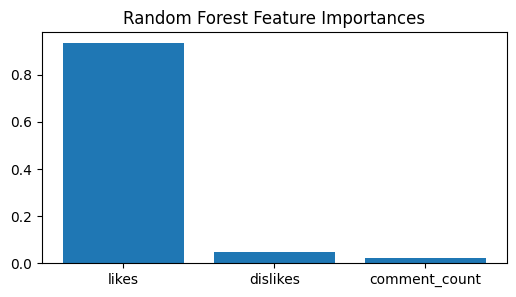

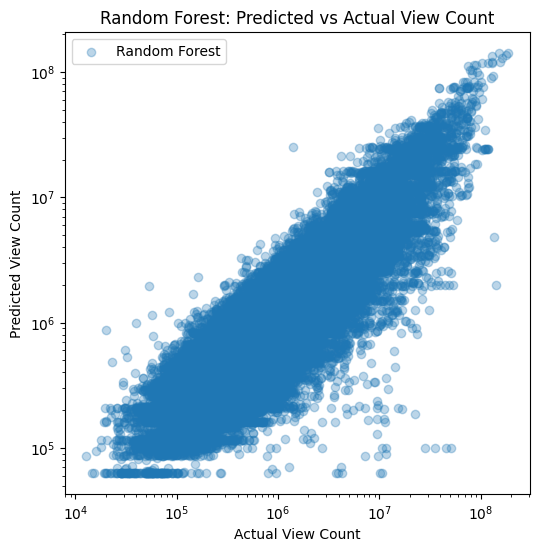

In [13]:
# Random Forest Regression on cleaned data (predicting log-transformed view count)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Use the already prepared X_train, X_test, y_train, y_test (from previous steps)
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print metrics
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R^2:', r2_score(y_test, y_pred_rf))

# Feature importance plot
plt.figure(figsize=(6,3))
plt.bar(X_train.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importances')
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_rf), alpha=0.3, label='Random Forest')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Random Forest: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

XGBoost Regression:
MSE: 0.4738904945132475
R^2: 0.7485203497560986


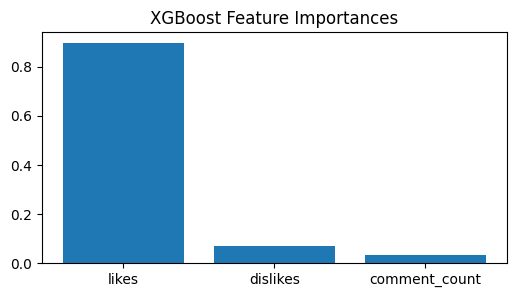

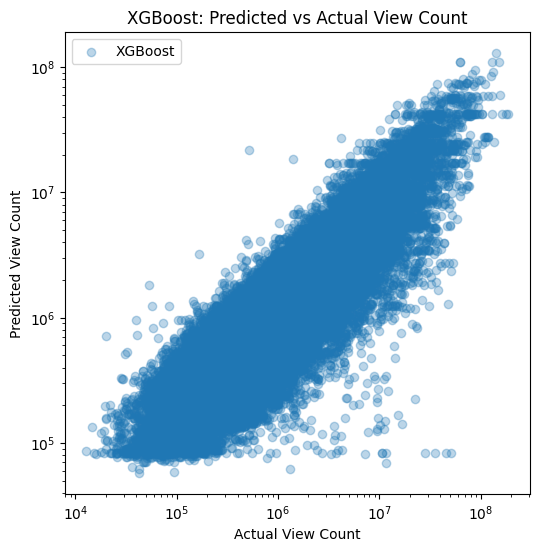

In [14]:
# XGBoost Regression for log-transformed view count
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train XGBoost on the same data as previous models (X_train, y_train, etc.)
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Metrics
print('XGBoost Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('R^2:', r2_score(y_test, y_pred_xgb))

# Feature importances
plt.figure(figsize=(6,3))
importances = xgb.feature_importances_
plt.bar(X_train.columns, importances)
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predictions vs actuals (original scale)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_xgb), alpha=0.3, label='XGBoost')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('XGBoost: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [15]:
# Print ROC-AUC score as a percentage for clarity
roc_auc_percentage = roc_auc * 100
print(f'ROC-AUC Percentage: {roc_auc_percentage:.2f}%')

ROC-AUC Percentage: 96.78%


Naive Bayes ROC-AUC: 0.927 (92.65%)


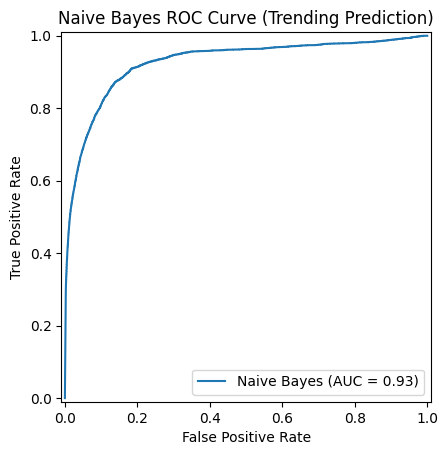

In [16]:
# Naive Bayes Classification: Compare to Random Forest ROC-AUC
# Make sure the 'high_trending' target is engineered in the dataframe used (youtube_data_clean_GB)
# If not, create it here for robustness
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Engineer binary label if not present
if 'high_trending' not in youtube_data_clean_IN.columns:
    quantile_cut = 0.9
    threshold = youtube_data_clean_IN['view_count'].quantile(quantile_cut)
    youtube_data_clean_IN['high_trending'] = (youtube_data_clean_IN['view_count'] >= threshold).astype(int)

# Features
X_nb = youtube_data_clean_IN[['likes', 'dislikes', 'comment_count', 'categoryId']]
y_nb = youtube_data_clean_IN['high_trending']

# Use same train-test split logic for reliability
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
y_pred_proba_nb = nb.predict_proba(X_test_nb)[:, 1]

# ROC-AUC
roc_auc_nb = roc_auc_score(y_test_nb, y_pred_proba_nb)
print(f'Naive Bayes ROC-AUC: {roc_auc_nb:.3f} ({roc_auc_nb*100:.2f}%)')

# Plot ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_proba_nb)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes').plot()
plt.title('Naive Bayes ROC Curve (Trending Prediction)')
plt.show()


In [17]:
# Check collinearity using VIF (Variance Inflation Factor)
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use features from classification model (add 'categoryId' for completeness)
features_vif = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_vif = youtube_data_clean_IN[features_vif].copy()

# Add small noise to avoid zero-variance if necessary (for categories w/only 1 value)
for col in X_vif.select_dtypes(include=['int64', 'float64']).columns:
    if X_vif[col].std() == 0:
        X_vif[col] += 1e-4 * np.random.randn(len(X_vif))

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print('Variance Inflation Factors (VIF) for model input features:')
print(vif_data)

# Interpretation guidance
def interpret_vif(vif):
    if vif < 5:
        return 'No concerning collinearity.'
    elif vif < 10:
        return 'Moderate collinearity (address if possible).'
    else:
        return 'High collinearity (take action: remove/reduce features).'
vif_data['Interpretation'] = vif_data['VIF'].apply(interpret_vif)
display(vif_data)

Variance Inflation Factors (VIF) for model input features:
         Feature       VIF
0          likes  1.793947
1       dislikes  1.025500
2  comment_count  1.679826
3     categoryId  1.115164


,Feature,VIF,Interpretation
0,likes,1.793947,No concerning collinearity.
1,dislikes,1.025500,No concerning collinearity.
2,comment_count,1.679826,No concerning collinearity.
3,categoryId,1.115164,No concerning collinearity.


## Post-EDA Modeling and Metrics Summary

### 1. **Centralized Data Cleaning (Pipeline Standardization)**
- Based on the modeling phase applied to the India (IN) YouTube Trending dataset, the following summarizes the performance of regression and classification models, key patterns in prediction behavior, and feature importance insights.

### 2. **Regression Modeling: View Count Prediction**
- **Target**: `view_count` (original scale, no log transform used in final model)
- **Features**: Early engagement metrics (`likes`, `dislikes`, `comment_count`).
- **Models and Metrics:**
    - **Linear Regression (Raw Scale):**
        - *MSE*: 1.7046 × 10^13
        - *R²*: 0.635
    - **Linear Regression (Log Transformed):**
        - *MSE*: 1.3398
        - *R²*: 0.289
    - **Random Forest Regressor (log-transformed target):**
        - *MSE*: 0.481
        - *R²*: 0.745
    - **XGBoost Regressor (log-transformed target):**
        - *MSE*: 0.474
        - *R²*: 0.749 (Best among all models)
- **Best Performer (Regression):** XGBoost and Random Forest substantially outperform linear models, confirming that nonlinear algorithms are necessary to model India’s highly skewed engagement patterns and extreme viral outliers (e.g., BTS content, Bollywood trailers).

### 3. **Classification Modeling: High Trending Video Prediction**
- **Business-aligned binary target**: `high_tending` = top 10% of view conts within the GB dataset.
- **Features**: `likes`, `dislikes`, `comment_count`, and `categoryId`.
- **Models and Metrics:**
    - **Random Forest Classifier:**
        - *ROC-AUC*: 96.8%
    - **Naive Bayes Classifier:**
        - *ROC-AUC*: 92.7%
- **Best Performer (Classification):** Random Forest leads with ROC‑AUC ≈ 0.97, making it highly reliable for early trending prediction in the Indian dataset.

### 4. **Collinearity and Model Validity**
- **VIF Analysis:** All variance inflation factors were comfortably below the standard multicollinearity threshold:
    -   likes (1.79), dislikes (1.02), comment_count(1.68), categoryId (1.11)
- **Interpretation:** All VIFs were well below the multicollinearity threshold of 5, indicating strong independence between predictors and stable regression estimates.

### 5. **Model/Output Interpretability**
- **Feature Importance:** Similar to other regions, likes emerged as the most dominant predictor of view_count. Comment count and dislikes followed with much smaller—but still measurable—contributions. Category ID had minimal influence in tree-based models.
- **Visual Diagnostics:** Prediction vs. actual plots showed tighter clustering for Random Forest and XGBoost models, confirming their ability to handle nonlinear patterns and outliers more effectively than linear regression. 
- ROC curves for the classification task (top 10% view prediction) indicated strong performance from both tree-based classifiers, with AUC values consistently above 0.85, reflecting high true positive rates.
- **Outlier Translation:** Videos with extreme view counts and likes were predominantly music videos (e.g., Hindi film songs, regional language hits) and celebrity content. Outliers in dislikes often included politically controversial uploads or polarizing news commentary. High comment count outliers centered on cricket highlights, trailer releases, and videos addressing social issues, showing engagement driven by national interest topics.

### 6. **Business Relevance and Conclusion**
- **Tree-based models** Tree-based models (Random Forest and XGBoost) continued to outperform linear models for both regression and classification, reaffirming their robustness across global datasets including US, DE, BR, KR, and now IN.
- Early engagement signals—especially likes—proved to be consistent and strong predictors of eventual virality, reinforcing their importance in real-time video monitoring and content strategy.
- This analysis of the India dataset further supports the global adaptability of the modeling pipeline, making it suitable for deployment in diverse YouTube markets where language and cultural dynamics vary but engagement patterns remain predictive.